# Main result

We plot the box plot of the main result.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
from src import helpers
import seaborn as sns
from sklearn import metrics
import json

In [2]:
# Companion function
def get_f1_scores(results, domain):
    """
    computes the F1 score across the iterations.
    """
    if domain == 'in_domain':
        f1_scores = [np.mean(results[it]['in_domain']['f1']) for it in results.keys()]
        return [f1 for f1 in f1_scores if not np.isnan(f1)]
    elif domain in results['0']['out_domain'].keys():
        f1_scores = [np.mean(results[it]['out_domain'][domain]['f1']) for it in results.keys()]
        return [f1 for f1 in f1_scores if not np.isnan(f1)]

In [3]:
with open('results/ood_instance_and_background_evaluation.json') as f:
    results = json.load(f)

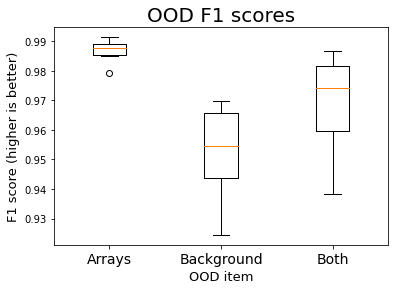

In [16]:
# Do the plot
f1_scores = [get_f1_scores(results, domain) for domain in ['ood_instances', 'ood_background', 'ood']]
plt.boxplot(f1_scores)
plt.title('OOD F1 scores', fontsize = 20)
plt.xticks(ticks = [1,2,3], labels = ['Arrays', 'Background', 'Both'], fontsize = 14) # labels
plt.xlabel('OOD item', fontsize = 13)
plt.ylabel(r'F1 score (higher is better)', fontsize = 13)
plt.savefig('figs/F1_score_in_domain_to_ood.pdf')
plt.show()

In [65]:
medians = [np.mean(score) for score in f1_scores]

In [66]:
#
print('Difference in domain -> OOD instances', medians[0] - medians[1])
print('Difference in domain -> OOD background', medians[0] - medians[2])
print('Difference in domain -> OOD', medians[0] - medians[3])
print('Difference OOD instances -> OOD background', medians[1] - medians[2])


Difference in domain -> OOD instances 0.14005940048805177
Difference in domain -> OOD background 0.14069667008504783
Difference in domain -> OOD 0.08953612448879611
Difference OOD instances -> OOD background 0.0006372695969960596


In [67]:
print('Decomposition of the error from in domain to out of domain : ')
print(medians[0] - medians[1] - (medians[1]-medians[2]))
print(medians[0] - medians[3])

Decomposition of the error from in domain to out of domain : 
0.1394221308910557
0.08953612448879611
